# kNN Sınıflandırma Algoritması


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
for column in df.columns:
    print(f"Sütun: {column}")
    print(df[column].unique())
    print()

Sütun: Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Sütun: Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

Sütun: BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

Sütun: SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
X=df.iloc[:,0:8]
Y=df.iloc[:,8]

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [30]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) #scale etmek için train seti kullanılır
X_test=scaler.transform(X_test)

In [31]:
knn=KNeighborsClassifier(n_neighbors=4) #k=4 olarak denendi

In [32]:
knn.fit(X_train,Y_train) ## kNN algoritmasını eğitir

KNeighborsClassifier(n_neighbors=4)

In [33]:
y_pred=knn.predict(X_test) #outcome değişkenini tahmin ediyor.

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [35]:
acc=accuracy_score(Y_test,y_pred)
print("Doğruluk:",acc)

Doğruluk: 0.7922077922077922


In [36]:
conf_mat=confusion_matrix(Y_test,y_pred)
print("confusion_matrix:\n",conf_mat)

confusion_matrix:
 [[102   5]
 [ 27  20]]


In [37]:
precision_score(Y_test,y_pred)

0.8

In [38]:
f1_score(Y_test,y_pred)

0.5555555555555556

In [39]:
recall_score(Y_test,y_pred)

0.425531914893617

In [40]:
accuracy_values=[]
k_values=[]
for k in range(1,21):
 knn=KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train,Y_train)
 y_pred=knn.predict(X_test)
 acc=accuracy_score(Y_test,y_pred)
 accuracy_values.append(acc)
 k_values.append(k)

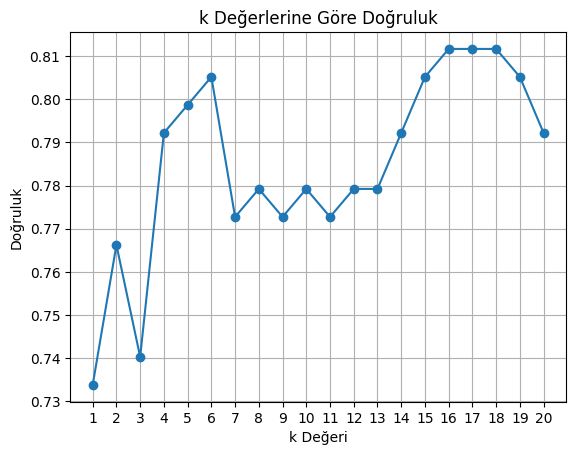

In [41]:
plt.figure()
plt.plot(k_values,accuracy_values,marker="o",linestyle="-")
plt.title("k Değerlerine Göre Doğruluk")
plt.xlabel("k Değeri")
plt.ylabel("Doğruluk")
plt.xticks(k_values) # X ekseni k değerleri olsun
plt.grid(True)
plt.show()


**kNN Algoritması İle Regresyon Problemi**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving deneyim_maas.csv to deneyim_maas.csv


In [ ]:
deneyim=pd.read_csv('deneyim_maas.csv')
print(deneyim)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


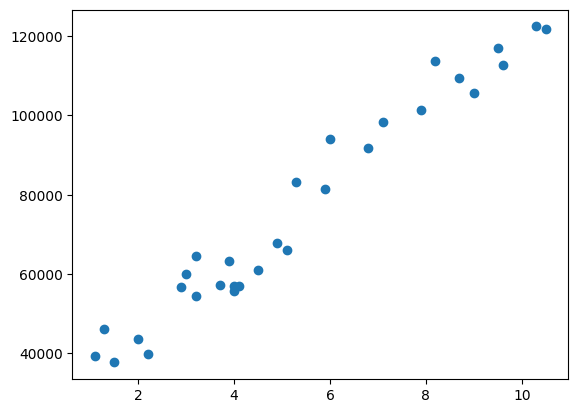

In [ ]:
plt.scatter(deneyim.YearsExperience,deneyim.Salary)
plt.show()

In [ ]:
scaler1=StandardScaler()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_reg=KNeighborsRegressor(n_neighbors=5)

In [ ]:
X1=deneyim.YearsExperience.values.reshape(-1,1)
Y1=deneyim.Salary.values.reshape(-1,1)
X_reg=scaler.fit_transform(X1)
Y_reg=scaler.fit_transform(Y1)

In [ ]:
knn_reg.fit(X_reg,Y_reg)

KNeighborsRegressor()

In [ ]:
y_reg_pred=knn_reg.predict(X_reg)

weight=distance parametresi, tahmin yapılırken komşuların ağırlıklandırılmasında kullanılan bir yöntemdir.

In [ ]:
for weight in ["distance"]:
  knn_reg=KNeighborsRegressor(n_neighbors=5)
  knn_reg.fit(X_reg,Y_reg)
  y_reg_pred=knn_reg.predict(X_reg)

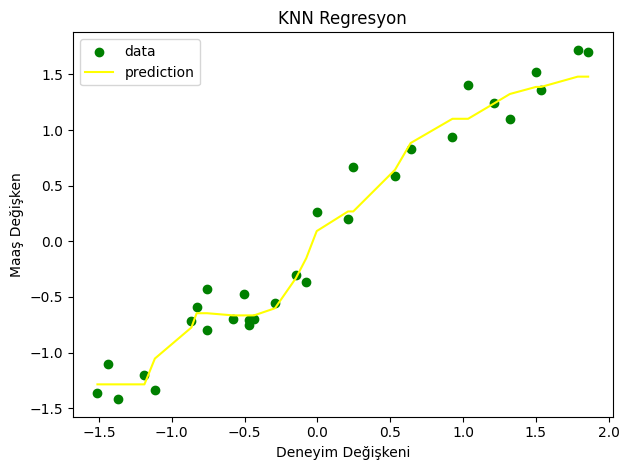

In [ ]:
plt.figure()
plt.scatter(X_reg,Y_reg,color="green",label="data")
plt.plot(X_reg,y_reg_pred,color="yellow",label="prediction")
plt.xlabel('Deneyim Değişkeni')
plt.ylabel('Maaş Değişken')
plt.title('KNN Regresyon')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_reg, y_reg_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.027120406213478176
